# SF-DAT-21 | Unit Project 4

In this project, you will summarize and present your analysis from Unit Projects 1-3.

### Question 1. Introduction: Write a problem Statement/Specific Aim for this project.

Answer: Predict the acceptance rate based on the independent variables
What are the correlations among the dependent and independent variables ?  

### Question 2. Dataset: Write up a description of your data and any cleaning that was completed.

Answer: 
Total of  400 observations in the dataset
Missing data in some observations 
Dropped observations with missing data
Checked the distribution of the independent variables (boxplot, histogram, scatter plot)
Transformed the variables 
Created dummy variables for prestige


### Question 3. Demo: Provide a table that explains the data by admission status.

                     0      1
     GPA            3.35   3.49
     GRE             574    619  
     Prestige_1      46%    54%
     Prestige_2      64%    36%
     Prestige_3      77%    23%
     Prestige_4      82%    18%

### Question 4. Methods: Write up the methods used in your analysis.

Answer:
Regression analysis (GPA and GRE)

Logistic Regression (Prestige)
Used the dummy variables


### Question 5. Results: Write up your results.

Answer:
PA are GRE are good indicators to predict the acceptance rate 
Looked at p-value <-- they are both smaller than 5%

Prestige 1 has higher acceptance rate than the other three groups.
Calculated the odd ratio

### Question 6. Visuals: Provide a table or visualization of these results.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df_raw = pd.read_csv("../../dataset/admissions.csv")

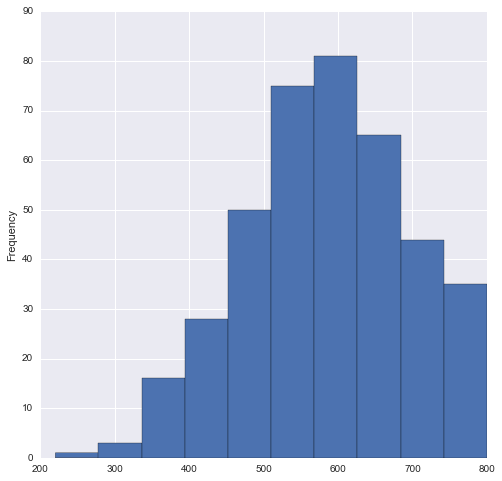

In [16]:
#to see if the chart looks reasonable
df_raw.gre.plot(kind = 'hist', figsize = (8, 8))

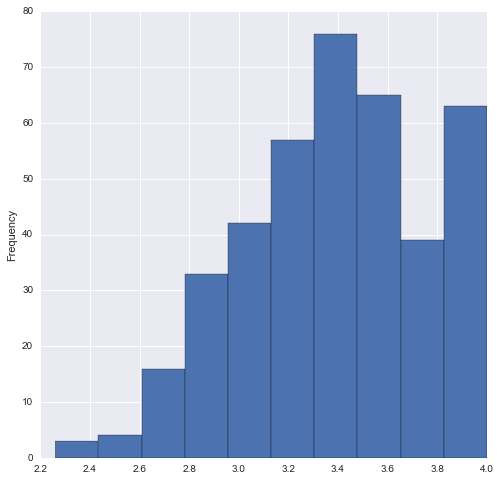

In [17]:
#to see if the chart looks reasonable
df_raw.gpa.plot(kind = 'hist', figsize = (8, 8))

In [18]:
#Look at the stats and see if we want to reject the hypothesis based on gpa and gre
model = smf.ols(formula = 'admit ~ gpa + gre', data = df_raw).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     9.435
Date:                Thu, 31 Mar 2016   Prob (F-statistic):           9.94e-05
Time:                        17:59:43   Log-Likelihood:                -250.43
No. Observations:                 397   AIC:                             506.9
Df Residuals:                     394   BIC:                             518.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5110      0.210     -2.433      0.015        -0.924    -0.098
gpa            0.1505      0.065      2.305      0.022         0.022     0.279
gre            0.0005      0.000      2.521      0.012         0.000     0.001
==============================================================================
Omnibus:                      461.825   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.306
Skew:                           0.720   Prob(JB):                     4.87e-14
Kurtosis:                       1.722   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import feature_selection, linear_model
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

In [9]:
#Create Dummy variables
dummy_ranks = pd.get_dummies(df_raw.prestige, prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [10]:
#combine new variables to the exisiting data
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df_raw[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit  gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           0           1           0
1      1  660  3.67           0           0           1           0
2      1  800  4.00           1           0           0           0
3      1  640  3.19           0           0           0           1
4      0  520  2.93           0           0           0           1


In [12]:
#Example of crosstab for prestige_1
pd.crosstab(handCalc.prestige_1, df_raw.admit, margins=True)

admit,0,1,All
prestige_1,,,
0.0,245,94,339
1.0,28,33,61
All,273,127,400


### question 7. Discussion: Write up your discussion and future steps.

Answer: Need to do validation on the model (train vs. test) 
Train = 60% of the data
Test = 40% of the data 
Rerun the model and compare the difference